<a href="https://colab.research.google.com/github/hwankang/Defense/blob/main/lstm_july25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Stock market prediction  using LSTM(  Using youtube tensor flow 2.0 Tutorial (KGP talkie)

In [6]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [7]:
from google.colab import files
uploaded = files.upload()

Saving GOOG.csv to GOOG (1).csv


In [8]:
pwd

'/content'

In [9]:
data=pd.read_csv('GOOG.csv', date_parser=True)#data에 파일내용을 옮김  
data.head()#앞의  5개만 보임 

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-05-26,538.119995,539.000000,529.880005,532.320007,532.320007,2406500
1,2015-05-27,532.799988,540.549988,531.710022,539.789978,539.789978,1525000
2,2015-05-28,538.010010,540.609985,536.250000,539.780029,539.780029,1029800
3,2015-05-29,537.369995,538.630005,531.450012,532.109985,532.109985,2597400
4,2015-06-01,536.789978,536.789978,529.760010,533.989990,533.989990,1904300


In [10]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1297,2020-07-20,1515.260010,1570.290039,1503.599976,1565.719971,1565.719971,1557300
1298,2020-07-21,1586.989990,1586.989990,1554.280029,1558.420044,1558.420044,1218600
1299,2020-07-22,1560.500000,1570.000000,1546.099976,1568.489990,1568.489990,932000
1300,2020-07-23,1566.969971,1571.869995,1507.391968,1515.680054,1515.680054,1627600
1301,2020-07-24,1498.930054,1517.635986,1488.400024,1511.869995,1511.869995,1544000


In [11]:
data_training = data[data['Date']<'2019-01-01'].copy()# 2018년 12월 31일까지의 data 만 data_training으로 복사함 
data_training

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-05-26,538.119995,539.000000,529.880005,532.320007,532.320007,2406500
1,2015-05-27,532.799988,540.549988,531.710022,539.789978,539.789978,1525000
2,2015-05-28,538.010010,540.609985,536.250000,539.780029,539.780029,1029800
3,2015-05-29,537.369995,538.630005,531.450012,532.109985,532.109985,2597400
4,2015-06-01,536.789978,536.789978,529.760010,533.989990,533.989990,1904300
...,...,...,...,...,...,...,...
903,2018-12-24,973.900024,1003.539978,970.109985,976.219971,976.219971,1590300
904,2018-12-26,989.010010,1040.000000,983.000000,1039.459961,1039.459961,2373300
905,2018-12-27,1017.150024,1043.890015,997.000000,1043.880005,1043.880005,2109800
906,2018-12-28,1049.619995,1055.560059,1033.099976,1037.079956,1037.079956,1414800


In [12]:
data_test = data[data['Date']>='2019-01-01'].copy()
data_test

,Date,Open,High,Low,Close,Adj Close,Volume
908,2019-01-02,1016.570007,1052.319946,1015.710022,1045.849976,1045.849976,1532600
909,2019-01-03,1041.000000,1056.979980,1014.070007,1016.059998,1016.059998,1841100
910,2019-01-04,1032.589966,1070.839966,1027.417969,1070.709961,1070.709961,2093900
911,2019-01-07,1071.500000,1074.000000,1054.760010,1068.390015,1068.390015,1981900
912,2019-01-08,1076.109985,1084.560059,1060.530029,1076.280029,1076.280029,1764900
...,...,...,...,...,...,...,...
1297,2020-07-20,1515.260010,1570.290039,1503.599976,1565.719971,1565.719971,1557300
1298,2020-07-21,1586.989990,1586.989990,1554.280029,1558.420044,1558.420044,1218600
1299,2020-07-22,1560.500000,1570.000000,1546.099976,1568.489990,1568.489990,932000
1300,2020-07-23,1566.969971,1571.869995,1507.391968,1515.680054,1515.680054,1627600


In [16]:
training_data = data_training.drop(['Date','Adj Close'],axis=1)
training_data.head()

,Open,High,Low,Close,Volume
0,538.119995,539.000000,529.880005,532.320007,2406500
1,532.799988,540.549988,531.710022,539.789978,1525000
2,538.010010,540.609985,536.250000,539.780029,1029800
3,537.369995,538.630005,531.450012,532.109985,2597400
4,536.789978,536.789978,529.760010,533.989990,1904300


In [17]:
scaler = MinMaxScaler()
training_data=scaler.fit_transform(training_data)
training_data

array([[0.02477711, 0.02165461, 0.02003163, 0.0206121 , 0.17666413],
       [0.01769792, 0.02371808, 0.02252538, 0.03055218, 0.09379847],
       [0.02463075, 0.02379795, 0.02871199, 0.03053894, 0.04724706],
       ...,
       [0.66220895, 0.69380528, 0.65657363, 0.70133071, 0.14877276],
       [0.70541583, 0.7093414 , 0.70576688, 0.69228208, 0.08343909],
       [0.70719888, 0.70553379, 0.69280772, 0.69032603, 0.0908185 ]])

In [31]:
X_train = []
y_train = []

In [32]:
training_data.shape[0]

908

In [33]:
for i in range(60,training_data.shape[0]):
    X_train.append(training_data[i-60:i])
    y_train.append(training_data[i,0])

In [34]:
X_train,y_train=np.array(X_train), np.array(y_train)

In [35]:
X_train.shape, y_train.shape

((848, 60, 5), (848,))

#### Building LSTM

In [37]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [41]:
regressior = Sequential()
regressior.add(LSTM(units =50,activation ='relu', return_sequences = True, input_shape =(X_train.shape[1],5)))
regressior.add(Dropout(0.2))

regressior.add(LSTM(units =60,activation ='relu', return_sequences = True))
regressior.add(Dropout(0.3))
               
regressior.add(LSTM(units =80,activation ='relu', return_sequences = True))
regressior.add(Dropout(0.4))
               
regressior.add(LSTM(units =120,activation ='relu'))
regressior.add(Dropout(0.5))
               
regressior.add(Dense(units =1))

In [42]:
regressior.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 60, 50)            11200     
_________________________________________________________________
dropout_12 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_13 (LSTM)               (None, 60, 60)            26640     
_________________________________________________________________
dropout_13 (Dropout)         (None, 60, 60)            0         
_________________________________________________________________
lstm_14 (LSTM)               (None, 60, 80)            45120     
_________________________________________________________________
dropout_14 (Dropout)         (None, 60, 80)            0         
_________________________________________________________________
lstm_15 (LSTM)               (None, 120)              

In [43]:
regressior.compile(optimizer='adam',loss='mean_squared_error')

In [44]:
regressior.fit(X_train,y_train,epochs=10, batch_size=32)

Epoch 1/10
27/27 [==============================] - 8s 146ms/step - loss: 0.0968
Epoch 2/10
27/27 [==============================] - 4s 143ms/step - loss: 0.0179
Epoch 3/10
27/27 [==============================] - 4s 146ms/step - loss: 0.0116
Epoch 4/10
27/27 [==============================] - 4s 144ms/step - loss: 0.0100
Epoch 5/10
27/27 [==============================] - 4s 144ms/step - loss: 0.0098
Epoch 6/10
27/27 [==============================] - 4s 145ms/step - loss: 0.0102
Epoch 7/10
27/27 [==============================] - 4s 143ms/step - loss: 0.0093
Epoch 8/10
27/27 [==============================] - 4s 146ms/step - loss: 0.0085
Epoch 9/10
27/27 [==============================] - 4s 143ms/step - loss: 0.0073
Epoch 10/10
27/27 [==============================] - 4s 143ms/step - loss: 0.0084


### Prepare test dataset

In [45]:
data_test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
908,2019-01-02,1016.570007,1052.319946,1015.710022,1045.849976,1045.849976,1532600
909,2019-01-03,1041.000000,1056.979980,1014.070007,1016.059998,1016.059998,1841100
910,2019-01-04,1032.589966,1070.839966,1027.417969,1070.709961,1070.709961,2093900
911,2019-01-07,1071.500000,1074.000000,1054.760010,1068.390015,1068.390015,1981900
912,2019-01-08,1076.109985,1084.560059,1060.530029,1076.280029,1076.280029,1764900


In [46]:
data_training.tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume
898,2018-12-17,1037.510010,1053.150024,1007.900024,1016.530029,1016.530029,2385400
899,2018-12-18,1026.089966,1049.479980,1021.440002,1028.709961,1028.709961,2192500
900,2018-12-19,1033.989990,1062.000000,1008.049988,1023.010010,1023.010010,2479300
901,2018-12-20,1018.130005,1034.219971,996.359985,1009.409973,1009.409973,2673500
902,2018-12-21,1015.299988,1024.020020,973.690002,979.539978,979.539978,4596000
903,2018-12-24,973.900024,1003.539978,970.109985,976.219971,976.219971,1590300
904,2018-12-26,989.010010,1040.000000,983.000000,1039.459961,1039.459961,2373300
905,2018-12-27,1017.150024,1043.890015,997.000000,1043.880005,1043.880005,2109800
906,2018-12-28,1049.619995,1055.560059,1033.099976,1037.079956,1037.079956,1414800
907,2018-12-31,1050.959961,1052.699951,1023.590027,1035.609985,1035.609985,1493300


In [47]:
past_60_days =data_training.tail(60)

In [48]:
df =past_60_days.append(data_test,ignore_index=True)

In [49]:
df =df.drop(['Date','Adj Close'],axis=1)
df.head()

,Open,High,Low,Close,Volume
0,1195.329956,1197.510010,1155.576050,1168.189941,2209500
1,1167.500000,1173.500000,1145.119995,1157.349976,1184300
2,1150.109985,1168.000000,1127.364014,1148.969971,1932400
3,1146.150024,1154.349976,1137.572021,1138.819946,1308700
4,1131.079956,1132.170044,1081.130005,1081.219971,2675700


In [50]:
inputs =scaler.transform(df)
inputs

array([[0.89930799, 0.89831672, 0.87266439, 0.86674648, 0.15814509],
       [0.86227545, 0.86635264, 0.85841597, 0.85232204, 0.06177087],
       [0.83913504, 0.8590306 , 0.83421999, 0.841171  , 0.13209622],
       ...,
       [1.38522954, 1.39420571, 1.40482932, 1.39941458, 0.03805334],
       [1.39383895, 1.3966952 , 1.35208211, 1.32914187, 0.10344341],
       [1.30330014, 1.32449447, 1.32620189, 1.32407193, 0.09558457]])

In [51]:
X_test =[]; y_test=[]

for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    y_test.append(inputs[i,0])

In [52]:
X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

((394, 60, 5), (394,))

In [53]:
y_pred = regressior.predict(X_test)

In [54]:
scaler.scale_

array([1.33067199e-03, 1.33128137e-03, 1.36269482e-03, 1.33067210e-03,
       9.40052831e-08])

In [55]:
scale = 1/1.33067199e-03
scale

751.4999996355225

In [56]:
y_pred = y_pred*scale
y_test =y_test*scale

y_test

### Visualization

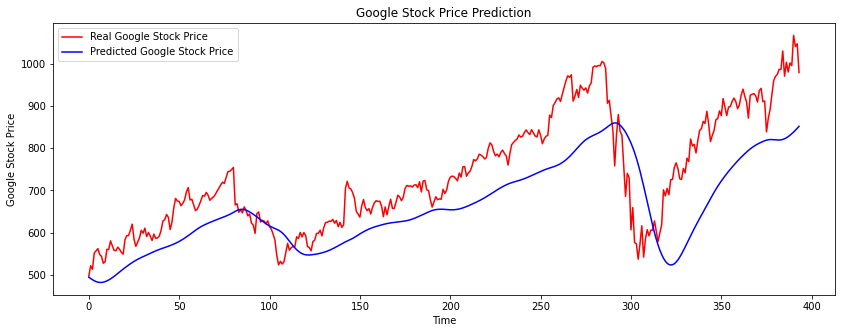

In [58]:
plt.figure(figsize=(14,5))
plt.plot(y_test,color = 'red', label='Real Google Stock Price')
plt.plot(y_pred,color = 'blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time') 
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()